In [1]:
import sys, os

# make sure the 'code' dir is on your path (change this):
codepath = '/user_data/mmhender/image_stats_gabor/code/'
sys.path.insert(0,codepath)

import numpy as np

from model_fitting import initialize_fitting 
from analyze_fits import analyze_gabor_params
from utils import default_paths
from analyze_features import load_feature_stats

import matplotlib.pyplot as plt
from matplotlib import cm

from plotting import load_fits, plot_utils

In [2]:
# Load everything

models = initialize_fitting.get_prf_models(which_grid=5)
n_prfs = len(models)
feature_type='gabor_solo'
subject=999

mean, var, covar = \
        load_feature_stats.load_feature_stats(feature_type, subject=subject)

partial_corr, partial_nsamp, partial_names, partial_signed_names = \
        load_feature_stats.load_feature_semantic_partial_corrs(feature_type, subject=subject,\
                                                       min_samp=20, verbose=True)

n_partial_discrim_types = partial_corr.shape[2]
axes_to_do_partial = [0,2,3]

In [3]:
# Gather information about the gabor feature channels
sf_unique, ori_unique = analyze_gabor_params.get_gabor_feature_info(n_ori=12, n_sf=8)
n_sf = len(sf_unique)
n_ori = len(ori_unique)

mean_reshaped = np.reshape(mean, [n_ori, n_sf, n_prfs], order = 'F')
var_reshaped = np.reshape(var, [n_ori, n_sf, n_prfs], order = 'F')
 
partial_corr_reshaped = np.reshape(partial_corr, [n_ori, n_sf, n_prfs, len(axes_to_do_partial)], order='F')

#### Plot partial correlations, overlaying different semantic axes

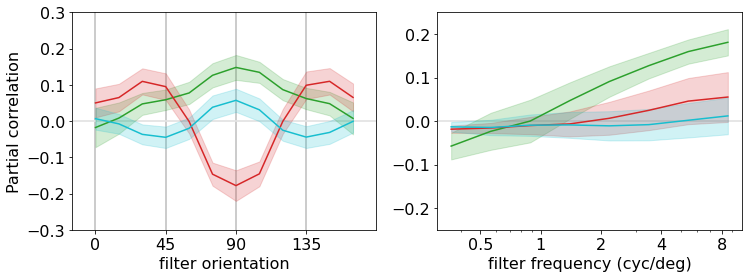

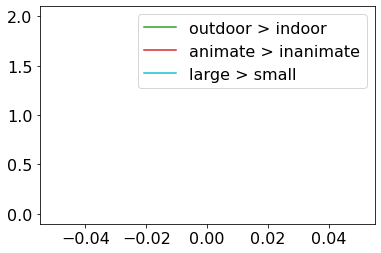

In [4]:
plt.figure(figsize=(12,4));

colors = cm.tab10(np.linspace(0,1,10))[[2, 3, 9],:]

plot_utils.set_all_font_sizes(16)

plt.rcParams['pdf.fonttype']=42

for ai, aa in enumerate(axes_to_do_partial):
   
    plt.subplot(1,2,1)
    mean_each_orient = np.mean(partial_corr_reshaped[:,:,:,ai], axis=1);
    meanvals = np.mean(mean_each_orient, axis=1)
    stdvals = np.std(mean_each_orient, axis=1)
   
    plt.plot(ori_unique, meanvals, color=colors[ai,:], zorder=10)
   
    plt.fill_between(ori_unique, meanvals-stdvals, meanvals+stdvals,
            alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)

    
    plt.xlabel('filter orientation');
    plt.xlim([-15, 180])
    for ii in np.arange(0,180,45):
        plt.axvline(ii, color=[0.8, 0.8, 0.8])
    plt.xticks(np.arange(0,180,45))
    plt.axhline(0, color=[0.9, 0.9, 0.9])
    plt.ylabel('Partial correlation')
    plt.ylim([-0.30, 0.30])
    
    ax = plt.subplot(1,2,2)
    mean_each_sf = np.mean(partial_corr_reshaped[:,:,:,ai], axis=0);
    meanvals = np.mean(mean_each_sf, axis=1)
    stdvals = np.std(mean_each_sf, axis=1)
    
    plt.plot(sf_unique, meanvals, color=colors[ai,:], zorder=10)
   
    plt.fill_between(sf_unique, meanvals-stdvals, meanvals+stdvals,
            alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)

    plt.xlabel('filter frequency (cyc/deg)');
    plt.axhline(0, color=[0.9, 0.9, 0.9]);
    plt.ylim([-0.25, 0.25])
    plt.gca().set_xscale('log')
    plt.xticks([10**np.log10(0.5), 10**np.log10(1), \
                    10**np.log10(2),10**np.log10(4), \
                    10**np.log10(8)],\
                   [0.5,1,2,4,8])

# plt.legend(lh, partial_signed_names)

fn2save = os.path.join(default_paths.fig_path,'Gabor_semantic_corrs.pdf')
plt.savefig(fn2save)

plt.figure();
for ai, aa in enumerate(axes_to_do_partial):
    plt.plot(0,ai, '-', color=colors[ai,:])
    
plt.legend(partial_signed_names)

[-0.12191894, 0.23869559]
[-0.20930007, 0.19472086]
[-0.06426953, 0.07242731]


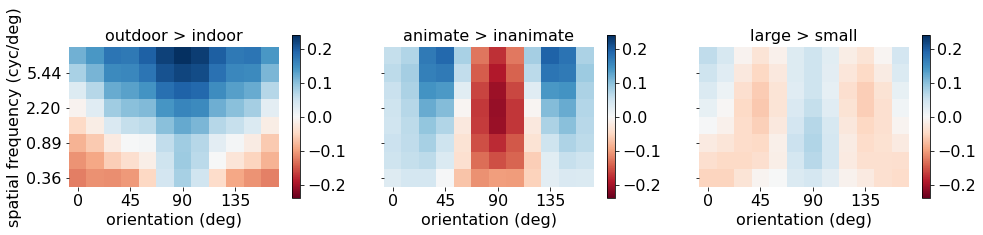

In [5]:
clims = [[-0.24, 0.24] for ai in range(3)];
# clims = [[-0.22, 0.22], [-0.21, 0.21], [-0.07, 0.07]]

plt.figure(figsize=(16,3));
    
for ai, aa in enumerate(axes_to_do_partial):
    
    plt.subplot(1,3,ai+1)
    
    image = np.mean(partial_corr_reshaped[:,:,:,ai], axis=2)
    print([np.min(image), np.max(image)])
    plt.pcolormesh(image.T, vmin=clims[ai][0], vmax=clims[ai][1], cmap=cm.RdBu)
    # plt.pcolormesh(image.T)
    plt.colorbar()
    plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
    sf_ticks = sf_unique[[0,2,4,6]].round(2)
    if ai==0:
        plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
        plt.ylabel('spatial frequency (cyc/deg)')
    else:
        plt.yticks(np.array([0,2,4,6])+0.5, [])
        
   
    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])
    # plt.axis('off')
    
    plt.xlabel('orientation (deg)')
    
    plt.title(partial_signed_names[ai])
    
    plt.box(False)
    
fn2save = fn2save = os.path.join(default_paths.fig_path,'Gabor_semantic_corrs_2dplots.pdf')
plt.savefig(fn2save)


#### Plot mean/variance each feature channel
Averaged across pRFs

0.03920804 0.13662134
0.00013643742 0.0012682579


Text(0.5, 1.0, 'var')

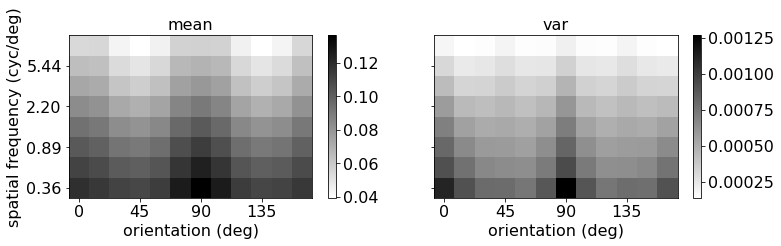

In [21]:
plt.figure(figsize=(12,3));

plt.subplot(1,2,1)

image = np.mean(mean_reshaped, axis=2)
print(np.min(image), np.max(image))
clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, vmin=clims[0], vmax=clims[1], cmap=cm.gray_r)
plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)

plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
plt.ylabel('spatial frequency (cyc/deg)')

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])
plt.xlabel('orientation (deg)')
plt.title('mean')

plt.subplot(1,2,2)

image = np.mean(var_reshaped, axis=2)
print(np.min(image), np.max(image))
clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, vmin=clims[0], vmax=clims[1], cmap=cm.gray_r)

plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)
plt.yticks(np.array([0,2,4,6])+0.5, [])

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])

plt.xlabel('orientation (deg)')

plt.title('var')
    

In [26]:
for ai, aa in enumerate(axes_to_do_partial):
    
    image1 = np.mean(partial_corr_reshaped[:,:,:,ai], axis=2)
    
    image2 = np.mean(mean_reshaped, axis=2)
    
    print('%s vs mean:'%(partial_signed_names[ai]))
    print('   %.3f'%np.corrcoef(image1.ravel(), image2.ravel())[0,1])
    
    image2 = np.mean(var_reshaped, axis=2)
    
    print('%s vs var:'%(partial_signed_names[ai]))
    print('   %.3f'%np.corrcoef(image1.ravel(), image2.ravel())[0,1])

outdoor > indoor vs mean:
   -0.740
outdoor > indoor vs var:
   -0.765
animate > inanimate vs mean:
   -0.447
animate > inanimate vs var:
   -0.292
large > small vs mean:
   0.091
large > small vs var:
   -0.056


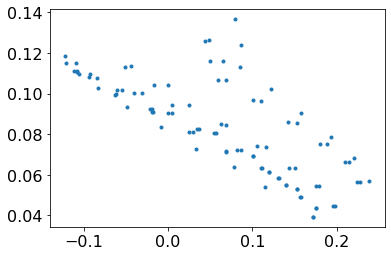

In [28]:
plt.figure();
ai=0;
image1 = np.mean(partial_corr_reshaped[:,:,:,ai], axis=2)
image2 = np.mean(mean_reshaped, axis=2)
    
plt.plot(image1.ravel(), image2.ravel(),'.')

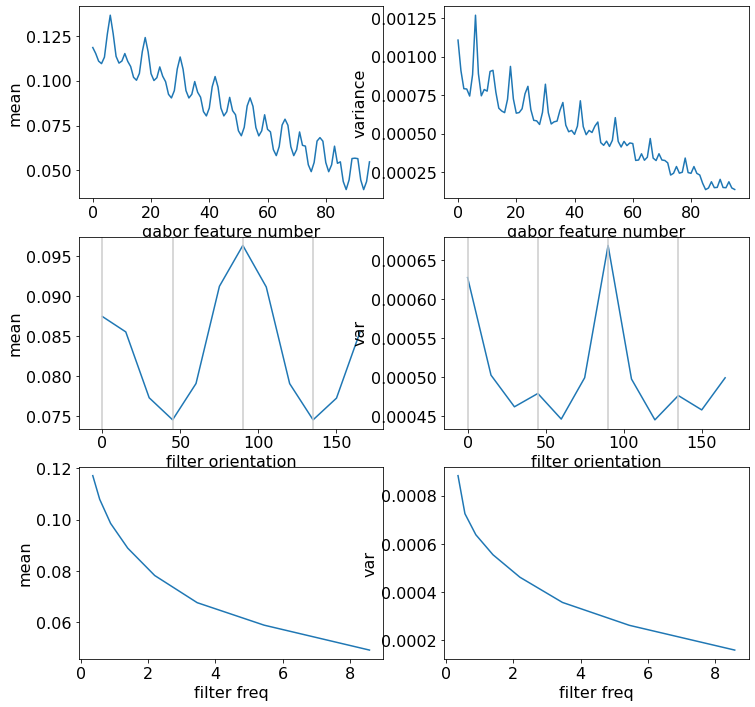

In [6]:
plt.figure(figsize=(12,12));

plt.subplot(3,2,1)
plt.plot(np.mean(mean, axis=1)[0:150])
plt.xlabel('gabor feature number');
plt.ylabel('mean');
plt.subplot(3,2,2)
plt.plot(np.mean(var, axis=1)[0:150])
plt.xlabel('gabor feature number');
plt.ylabel('variance');
     
plt.subplot(3,2,3)
plt.plot(ori_unique, np.mean(np.mean(mean_reshaped, axis=2), axis=1))
plt.xlabel('filter orientation');
plt.ylabel('mean');
plt.xlim([-15, 180])
for ii in np.arange(0,180,45):
    plt.axvline(ii, color=[0.8, 0.8, 0.8])

plt.subplot(3,2,4)
plt.plot(ori_unique, np.mean(np.mean(var_reshaped, axis=2), axis=1))
plt.xlabel('filter orientation');
plt.ylabel('var');
plt.xlim([-15, 180])
for ii in np.arange(0,180,45):
    plt.axvline(ii, color=[0.8, 0.8, 0.8])
    
plt.subplot(3,2,5)
plt.plot(sf_unique, np.mean(np.mean(mean_reshaped, axis=2), axis=0))
plt.xlabel('filter freq');
plt.ylabel('mean');

plt.subplot(3,2,6)
plt.plot(sf_unique, np.mean(np.mean(var_reshaped, axis=2), axis=0))
plt.xlabel('filter freq');
plt.ylabel('var');